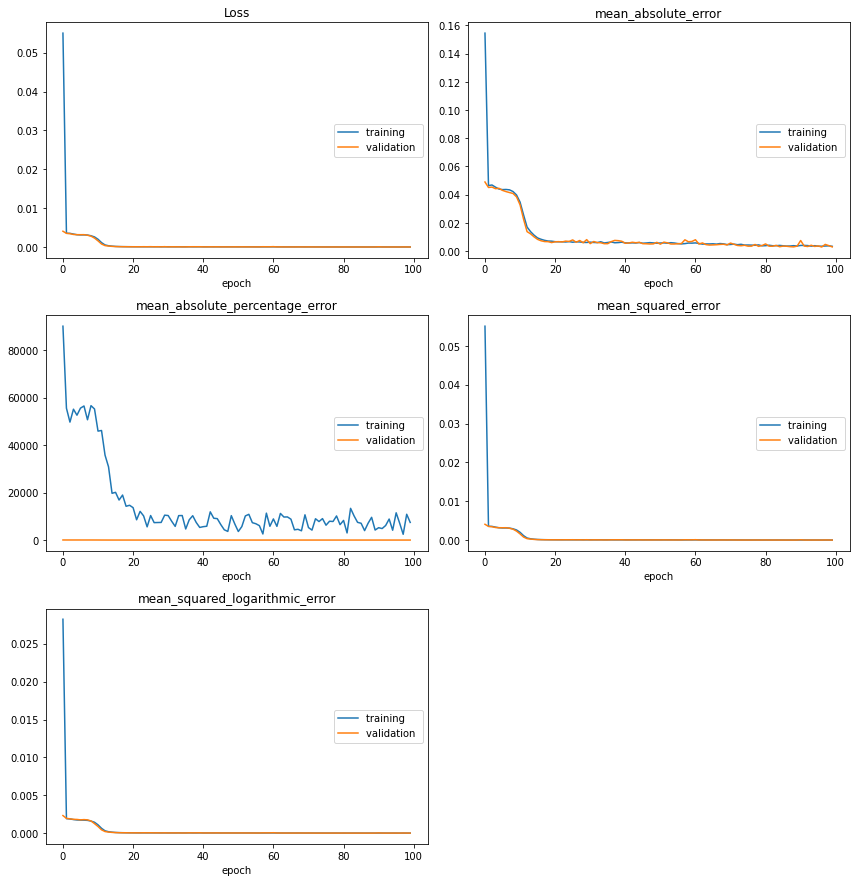

Loss
	training         	 (min:    0.000, max:    0.055, cur:    0.000)
	validation       	 (min:    0.000, max:    0.004, cur:    0.000)
mean_absolute_error
	training         	 (min:    0.003, max:    0.155, cur:    0.003)
	validation       	 (min:    0.003, max:    0.049, cur:    0.003)
mean_absolute_percentage_error
	training         	 (min: 2430.406, max: 90150.039, cur: 7435.145)
	validation       	 (min:    2.183, max:   34.968, cur:    2.183)
mean_squared_error
	training         	 (min:    0.000, max:    0.055, cur:    0.000)
	validation       	 (min:    0.000, max:    0.004, cur:    0.000)
mean_squared_logarithmic_error
	training         	 (min:    0.000, max:    0.028, cur:    0.000)
	validation       	 (min:    0.000, max:    0.002, cur:    0.000)
3520/3520 - 2s - loss: 1.9328e-05 - mean_squared_error: 1.9328e-05 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 7435.1450 - mean_squared_logarithmic_error: 1.0426e-05 - val_loss: 1.5431e-05 - val_mean_squared_error

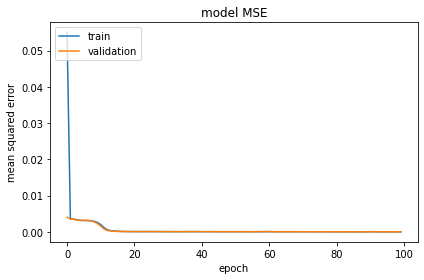

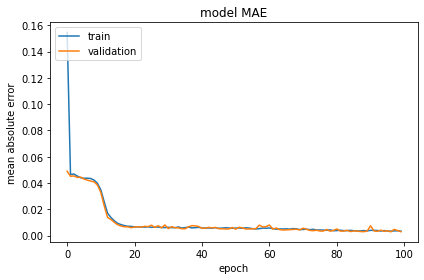

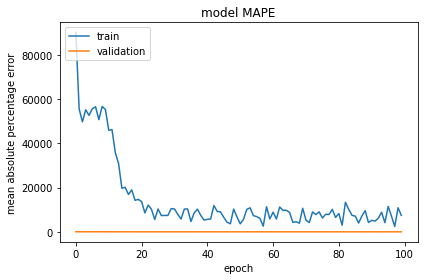

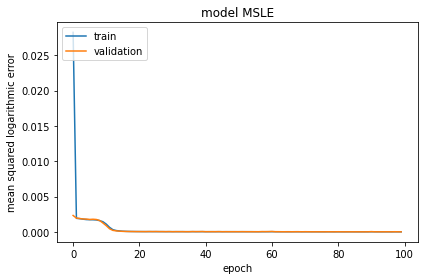

Final score (MSE): 1.5431291835426374e-05
Final score (MAE): 0.002958387051256676
Final score (RMSE): 0.0039282682998270846


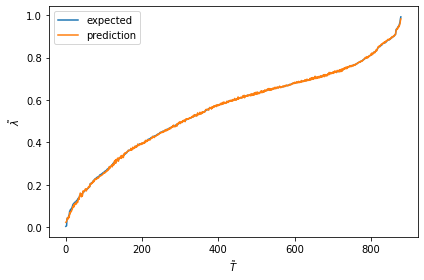

X=[9.e-01 1.e+03], Predicted=[0.05081828]
X=[9.e-01 5.e+03], Predicted=[0.12508604]
X=[9.e-01 1.e+04], Predicted=[0.17576297]
X=[9.0e-01 1.5e+04], Predicted=[0.21395178]
X=[9.e-01 2.e+04], Predicted=[0.23875298]
X=[9.0e-01 2.5e+04], Predicted=[0.25476256]
X=[9.e-01 3.e+04], Predicted=[0.26985934]
X=[9.0e-01 3.5e+04], Predicted=[0.28495613]
X=[9.e-01 4.e+04], Predicted=[0.3005399]


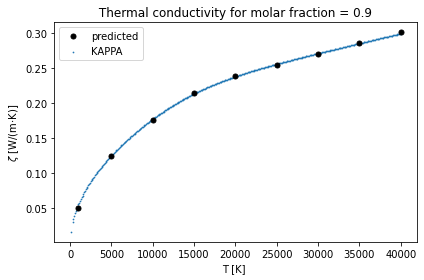

In [2]:
# https://datascienceplus.com/keras-regression-based-neural-networks/
# https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_04_3_regression.ipynb
# https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
# https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/
# https://stackoverflow.com/questions/49008074/how-to-create-a-neural-network-for-regression
# https://www.pyimagesearch.com/2019/01/21/regression-with-keras/
# https://www.tensorflow.org/tutorials/keras/regression?hl=en
# https://keras.rstudio.com/articles/tutorial_basic_regression.html
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# https://github.com/keras-team/keras/issues/7947
# https://stackoverflow.com/questions/42665359/how-do-you-compute-accuracy-in-a-regression-model-after-rounding-predictions-to
# https://stackoverflow.com/questions/42699243/how-to-build-a-lift-chart-a-k-a-gains-chart-in-python

# https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/
# https://github.com/deepray/Deep_Learning_Tutorial/blob/master/Examples/Regression/train_network.ipynb
# https://medium.com/@joaogabriellima/visualizing-the-architecture-of-your-own-model-of-artificial-neural-networks-7f0ea6b2a86d

# https://www.kaggle.com/amarjeet007/visualize-cnn-with-keras

# https://medium.com/inbrowserai/simple-diagrams-of-convoluted-neural-networks-39c097d2925b
#https://www.machinecurve.com/index.php/2019/12/03/visualize-keras-models-overview-of-visualization-methods-tools/

# https://colab.research.google.com/drive/1J8ZTI2UIJCwml2nrLVu8Gg0GXEz-7ZK0#scrollTo=CHSMp0zJwKRc


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn import metrics
from tensorflow import keras
from tensorflow.keras import layers
from IPython.display import clear_output
from livelossplot import PlotLossesKeras
from time import time
from keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
from keras.models import load_model

from ann_visualizer.visualize import ann_viz;
from keras.models import model_from_json

from keras_sequential_ascii import keras2ascii
from livelossplot import PlotLossesKeras

import os;
path="."
os.chdir(path)
os.getcwd()

# Variables
dataset=np.loadtxt("../../data/dataset_lite.csv", delimiter=",")
x=dataset[:,0:2]
# Change to 2, 3, 4 for shear, bulk and conductivity, respectively.
y=dataset[:,4] # 0: X, 1: T, 2: shear, 3: bulk, 4: conductivity

print(x.shape, y.shape)

# Plot
plt.scatter(x[:,1], dataset[:,4], s=0.5)
plt.title('Thermal conductivity')
plt.xlabel('T [K]')
plt.ylabel(r'$\lambda$ [W/(m⋅K)]')
plt.tight_layout()
plt.savefig("thermal_conductivity.pdf")
plt.show()

# Since implementing a neural network, the variables need to be normalized in order for the neural network to interpret
# them properly. Therefore, variables are transformed using the MaxMinScaler()
y=np.reshape(y, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x))
xscale=scaler_x.transform(x)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

#plt.scatter(xscale[:,1], yscale, s=0.5)
#plt.title('Scaled input data')
#plt.xlabel(' ')
#plt.ylabel(' ')
#plt.show()

# The data is then split into training and test data
#X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size=0.2, random_state=42)

# returns a compiled model identical to the saved one
#model = load_model('shear_model.h5')
model = Sequential()

# Usually it's a good practice to apply following formula in order to find out the total number of hidden layers needed.
#
# Nh = Ns/(α∗ (Ni + No))
#
# where
#
#    Ni = number of input neurons.
#    No = number of output neurons.
#    Ns = number of samples in training data set.
#    α = an arbitrary scaling factor usually 2-10.

# Create a TensorBoard instance with the path to the logs directory
#tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

# The Input Layer
model.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu')) # Hidden 1

# The Hidden Layers
model.add(Dense(20, kernel_initializer='normal', activation='relu'))              # Hidden 2
#model.add(Dense(100, kernel_initializer='normal', activation='relu'))              # Hidden 2
#model.add(Dense(100, kernel_initializer='normal', activation='relu'))              # Hidden 2
#model.add(Dense(100, kernel_initializer='normal', activation='relu'))              # Hidden 2

# The Output Layer
model.add(Dense(1, activation='linear'))                                           # Output

model.summary()
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
keras2ascii(model)

# serialize model to JSON
#model_json = model.to_json()
#with open("model.json", "w") as json_file:
#    json_file.write(model_json)

# serialize weights to HDF5
#model.save('model.h5')  # creates a HDF5 file 'model.h5'
#model.save_weights("model_weights.h5")
#print("Saved model to disk")

# load json and create model
#json_file = open('model.json', 'r')
#loaded_model_json = json_file.read()
#json_file.close()

#model = model_from_json(loaded_model_json)

# load weights into new model
#model.load_weights("model_weights.h5")

#ann_viz(model, title="Artificial Neural network - Model Visualization")

# mse:  loss = square(y_true - y_pred)
# mae:  loss = abs(y_true - y_pred)
# mape: loss = 100 * abs(y_true - y_pred) / y_true
# msle: loss = square(log(y_true + 1.) - log(y_pred + 1.))
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape', 'msle'])

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Train model
# The validation_split set to 0.2, 80% of the training data is used to test the model, while the remaining 20% is used for testing.
#history = model.fit(X_train, y_train, epochs=100, batch_size=20, verbose=2, validation_split=0.2, callbacks=[tensorboard])
history = model.fit(X_train, y_train, epochs=100, batch_size=20, verbose=2, validation_data=(X_test, y_test), callbacks=[PlotLossesKeras()])
#history = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[monitor], verbose=2, batch_size=10, epochs=100)
#history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0, validation_split=0.2, callbacks=[PlotLossesKeras()])
#history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0, validation_split=0.2, callbacks=[tensorboard])

# Plot metrics
print(history.history.keys())

# "Loss"
plt.figure()
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model MSE')
plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.tight_layout()
plt.savefig("MSE.pdf", dpi=150)
plt.show()

plt.figure()
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model MAE')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.tight_layout()
plt.savefig("MAE.pdf", dpi=150)
plt.show()

plt.figure()
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('model MAPE')
plt.ylabel('mean absolute percentage error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.tight_layout()
plt.savefig("MAPE.pdf", dpi=150)
plt.show()

plt.figure()
plt.plot(history.history['mean_squared_logarithmic_error'])
plt.plot(history.history['val_mean_squared_logarithmic_error'])
plt.title('model MSLE')
plt.ylabel('mean squared logarithmic error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.tight_layout()
plt.savefig("MSLE.pdf", dpi=150)
plt.show()

# Predict
pred = model.predict(X_test)

score = metrics.mean_squared_error(pred, y_test)
print("Final score (MSE): {}".format(score))

score = metrics.mean_absolute_error(pred, y_test)
print("Final score (MAE): {}".format(score))

# Measure RMSE error. RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print("Final score (RMSE): {}".format(score))

# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel(r'$\tilde{\lambda}$')
    plt.xlabel(r'$\tilde{T}$')
    plt.legend()
    plt.tight_layout()
    plt.savefig("adim_regression.pdf", dpi=150)
    plt.show()

# Plot the chart
chart_regression(pred.flatten(), y_test)

# Pick up a single value ...
Xnew = np.array([[0.9, 1000],  [0.9, 5000], [0.9, 10000], [0.9, 15000], [0.9, 20000], [0.9, 25000], 
                 [0.9, 30000], [0.9, 35000], [0.9, 40000]])
#Xnew = scaler_x.transform(Xnew)
#ynew = model.predict(Xnew)
#Xnew = np.array([[0.9, 24000]])
Xnew = scaler_x.transform(Xnew)
ynew = model.predict(Xnew)

# Invert normalize
ynew = scaler_y.inverse_transform(ynew)
Xnew = scaler_x.inverse_transform(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
    print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

plt.scatter(x[3602:4001,1], y[3602:4001], s=0.5, label='KAPPA')
#plt.plot(x[3841,1], ynew[0], 'o', color='black')
plt.plot(Xnew[:,1], ynew[:], 'o', color='black', label='predicted', linewidth=2, markersize=5)
#plt.errorbar(Xnew[:,1], ynew[:], 'o', color='black', label='predicted', yerr=err, fmt='.k');
plt.title(' Thermal conductivity for molar fraction = 0.9 ')
plt.ylabel(r'$\zeta$ [W/(m⋅K)]')
plt.xlabel('T [K] ')
plt.legend()
plt.tight_layout()
plt.savefig("dim_regression.pdf", dpi=150, crop='false')
plt.show()

#xs = np.array(Xnew[:,1])
#ys = np.array(ynew)
#fig, ax = plt.subplots(constrained_layout=True)
#x = np.arange(0, 360, 1)
#y = np.sin(2 * x * np.pi / 180)
#ax.plot(xs, ys)
#ax.set_xlabel('angle [degrees]')
#ax.set_ylabel('signal')
#ax.set_title('Sine wave')
#plt.show()
#
#N = 100
#r0 = 0.6
#x = 0.9 * np.random.rand(N)
#y = 0.9 * np.random.rand(N)
#area = (20 * np.random.rand(N))**2  # 0 to 10 point radii
#c = np.sqrt(area)
#r = np.sqrt(x ** 2 + y ** 2)
#area1 = np.ma.masked_where(r < r0, area)
#area2 = np.ma.masked_where(r >= r0, area)
#plt.scatter(x, y, s=area1, marker='^', c=c)
#plt.scatter(x, y, s=area2, marker='o', c=c)
# Show the boundary between the regions:
#theta = np.arange(0, np.pi / 2, 0.01)
#plt.plot(r0 * np.cos(theta), r0 * np.sin(theta))
#
#plt.show()